# Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define a mapping for renaming columns with special characters
column_mapping = {
    '[run number]': 'run_number',
    'traffic-flow-from-west': 'traffic_flow_from_west',
    'max-accel': 'max_accel',
    'cool-down': 'cool_down',
    'bonus-delay': 'bonus_delay',
    'time-window': 'time_window',
    'traffic-flow-from-south': 'traffic_flow_from_south',
    'traffic-flow-from-north': 'traffic_flow_from_north',
    'signal-NS?': 'signal_NS',
    'speed-limit': 'speed_limit',
    'max-brake': 'max_brake',
    'traffic-flow-from-east': 'traffic_flow_from_east',
    '[step]': 'step',
    'time': 'time',
    'avg_reward': 'avg_reward',
    'pass-car': 'pass_car',
    'average-speed': 'average_speed',
    'average-wait': 'average_wait',
    'average-drive': 'average_drive',
    'switch-probability': 'switch_probability'
}

In [21]:
def getBoxplots(df):
    columns_to_plot = df.columns.to_list()

    # Plot the box plots
    plt.figure(figsize=(12, 6))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(1, len(columns_to_plot), i)
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.title(f'Box Plot for {column}')
        plt.grid(True, axis='y', linestyle='--')

        # Calculate statistics for each column
        column_max = df[column].max()
        column_min = df[column].min()
        column_mean = df[column].mean()

        # Add text annotations for mean, max, and min values
        plt.text(1, column_mean, f"Mean: {column_mean:.2f}", ha='center', va='bottom', color='red')
        plt.text(1, column_max, f"Max: {column_max}", ha='center', va='bottom', color='blue')
        plt.text(1, column_min, f"Min: {column_min}", ha='center', va='top', color='green')
    plt.tight_layout()
    plt.show()


In [4]:
def getTrend(df_bd):
    # List of columns to plot
    columns_to_plot = ['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']

    # Plot each column separately
    plt.figure(figsize=(12, 10))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(5, 1, i)
        plt.scatter(df_bd.index, df_bd[column], marker='o',s=1)
        plt.xlabel('step')
        plt.ylabel(column)
        plt.title(f'{column} trend during training')
        plt.grid(True, linestyle='--')
        # Fit a linear regression line
        z = np.polyfit(df_bd.index, df_bd[column], 5)
        p = np.poly1d(z)
        plt.plot(df_bd.index, p(df_bd.index), color='red')


    plt.tight_layout()
    plt.show()

# Data analysis

This is a document for analysis the stupid model solution

## Pre-define mode

### Ramdom mode

In [5]:
df = pd.read_csv('./model/0_singel_junction_model_random_random.csv')
df.rename(columns=column_mapping, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   run_number               10000 non-null  int64  
 1   traffic_flow_from_west   10000 non-null  int64  
 2   cool_down                10000 non-null  int64  
 3   max_accel                10000 non-null  int64  
 4   time_window              10000 non-null  int64  
 5   random-switch?           10000 non-null  bool   
 6   traffic_flow_from_south  10000 non-null  int64  
 7   switch_probability       10000 non-null  int64  
 8   traffic_flow_from_north  10000 non-null  int64  
 9   signal_NS                10000 non-null  bool   
 10  speed_limit              10000 non-null  int64  
 11  max_brake                10000 non-null  int64  
 12  traffic_flow_from_east   10000 non-null  int64  
 13  step                     10000 non-null  int64  
 14  pass_car               

In [6]:
# Extract the specified columns into a new DataFrame
new_df = df[['pass_car', 'average_speed', 'average_wait', 'average_drive']].copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pass_car       10000 non-null  int64  
 1   average_speed  10000 non-null  float64
 2   average_wait   10000 non-null  float64
 3   average_drive  10000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


In [7]:
new_df = new_df[new_df['average_wait'] != 0]
new_df.describe()

,pass_car,average_speed,average_wait,average_drive
count,9988.000000,9988.000000,9988.000000,9988.000000
mean,92.049559,2.900935,9.908879,4.240367
std,15.055914,0.339255,5.307988,0.221147
min,27.000000,1.664770,0.148148,3.068966
25%,83.000000,2.673386,6.361613,4.095722
50%,93.000000,2.895059,8.673799,4.247059
75%,102.000000,3.119790,11.913013,4.392857
max,137.000000,4.490741,70.735294,5.060976


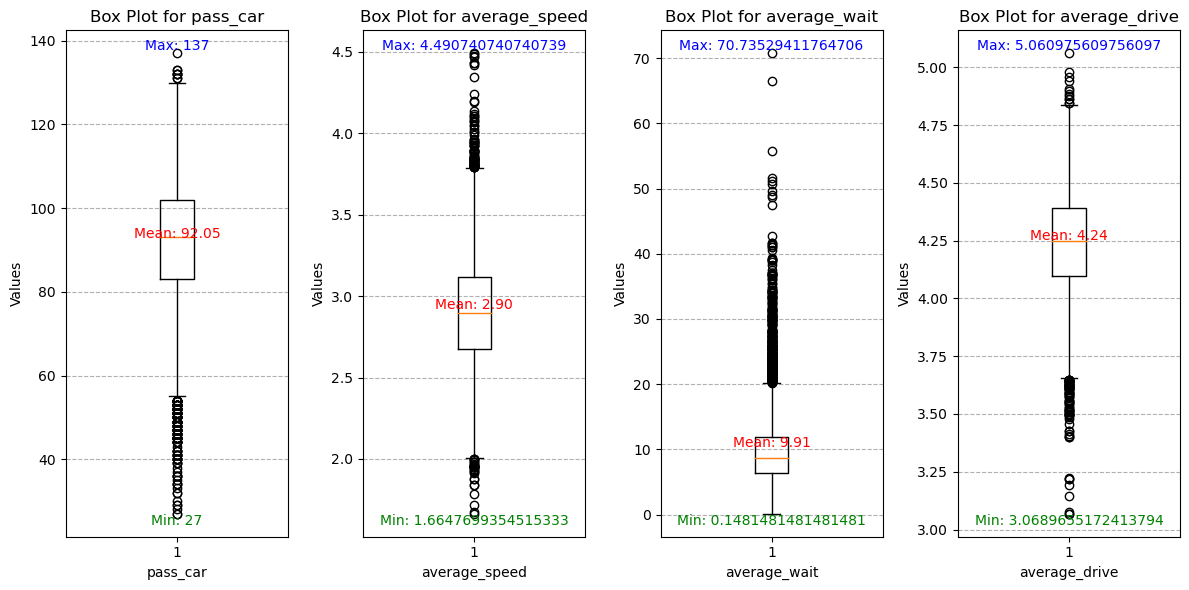

In [8]:
getBoxplots(new_df)

### Not-random mode

In [9]:
df_2 = pd.read_csv('./model/0_singel_junction_model_random_notrandom.csv')
df_2.rename(columns=column_mapping, inplace=True)

In [10]:
new_df_2 = df_2[['pass_car', 'average_speed', 'average_wait', 'average_drive']].copy()
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pass_car       10000 non-null  int64  
 1   average_speed  10000 non-null  float64
 2   average_wait   10000 non-null  float64
 3   average_drive  10000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


In [11]:
new_df_2.describe()

,pass_car,average_speed,average_wait,average_drive
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,111.104300,2.817983,4.423838,4.465236
std,8.814544,0.154316,0.538395,0.136810
min,76.000000,2.257469,2.419643,3.969072
25%,105.000000,2.711367,4.055021,4.373737
50%,111.000000,2.814887,4.418182,4.466416
75%,117.000000,2.920294,4.787678,4.560345
max,144.000000,3.436288,6.735849,5.028571


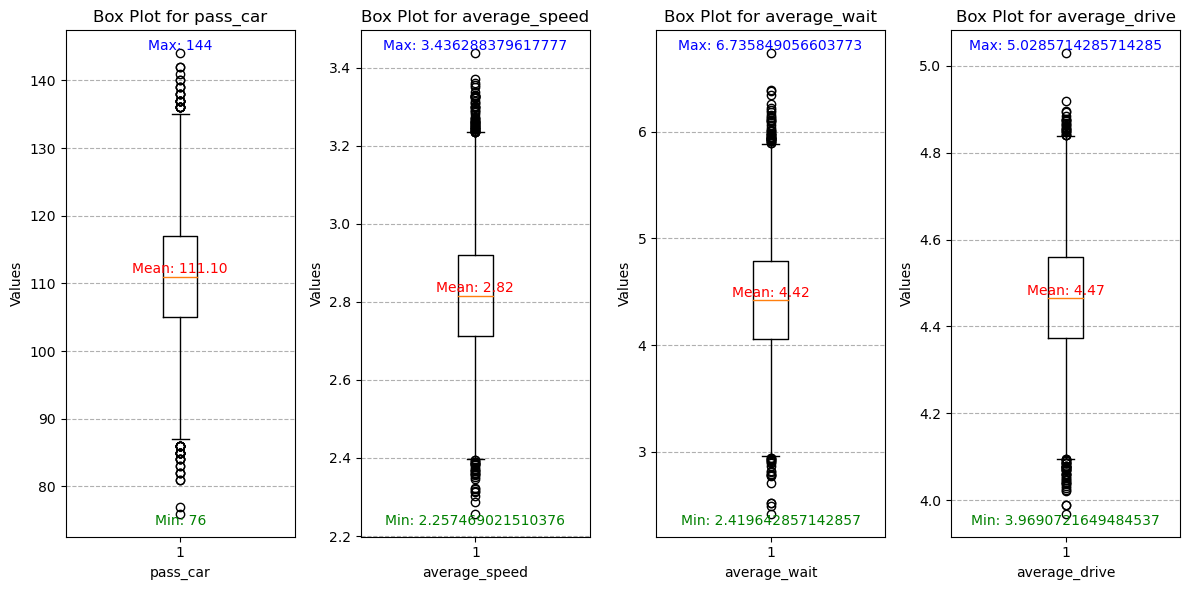

In [12]:
getBoxplots(new_df_2)

### Simulation

## RL mode

### Test mode

In [13]:
df_rl_1 = pd.read_csv('./model/0_singel_junction_model_bd_1_RL-table.csv')
df_rl_1.rename(columns=column_mapping, inplace=True)
df_rl_1 = df_rl_1[['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']].copy()
# df_rl_1.info()

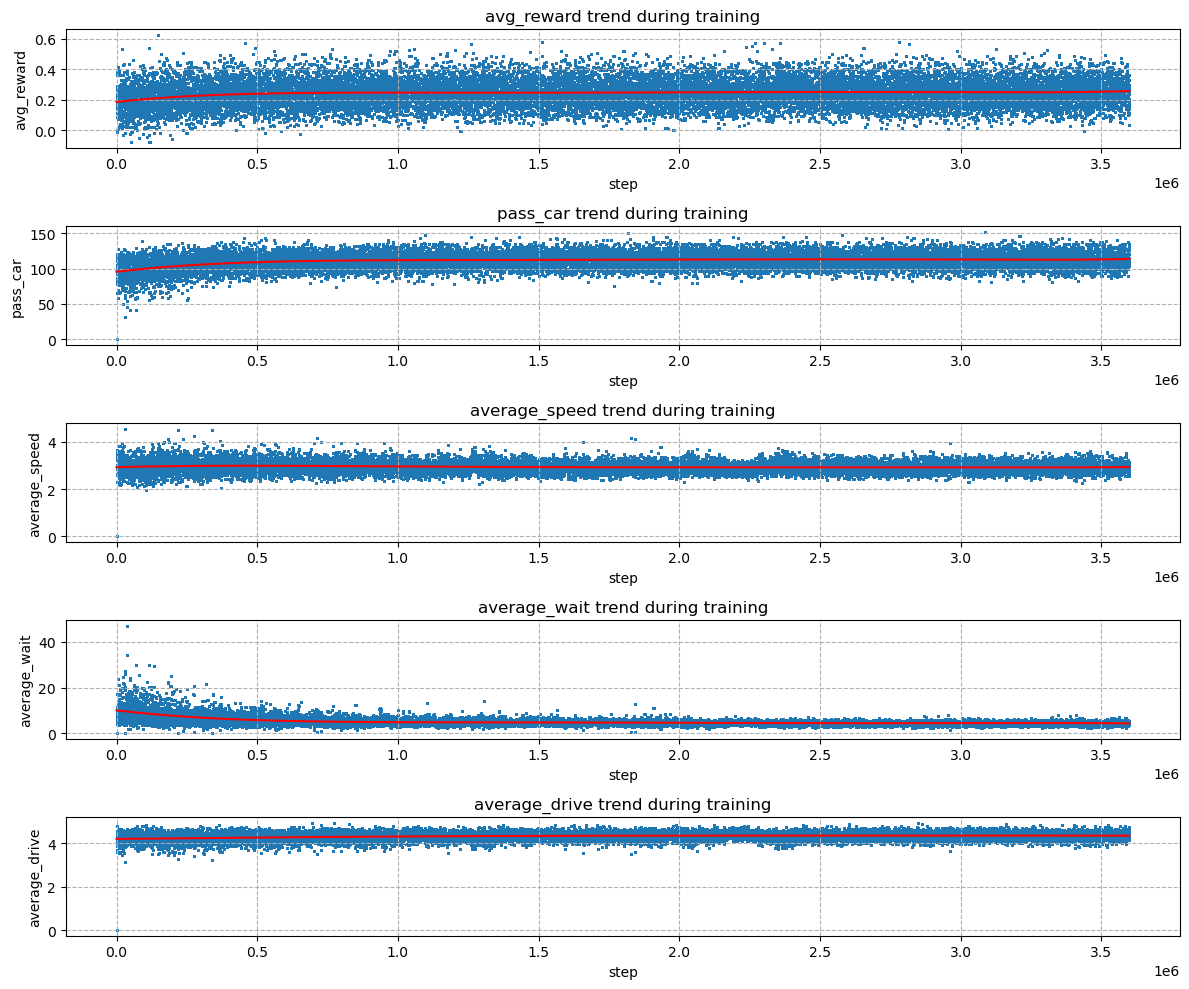

In [14]:
getTrend(df_rl_1)

In [15]:
df_rl_1.tail(100).describe()

,avg_reward,pass_car,average_speed,average_wait,average_drive
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.174418,125.050000,2.632493,5.397330,4.648691
std,0.015524,4.161815,0.038726,0.136865,0.043981
min,0.170874,107.000000,2.623653,4.803738,4.457944
25%,0.170874,126.000000,2.623653,5.428571,4.658730
50%,0.170874,126.000000,2.623653,5.428571,4.658730
75%,0.170874,126.000000,2.623653,5.428571,4.658730
max,0.241747,126.000000,2.800452,5.428571,4.658730


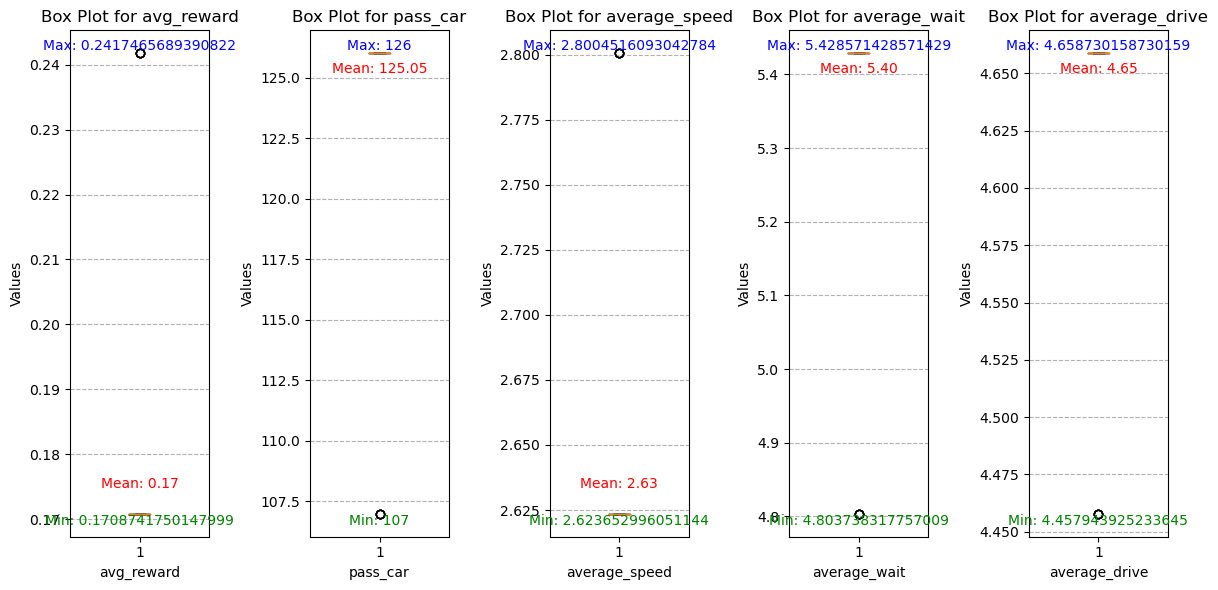

In [22]:
getBoxplots(df_rl_1.tail(100))

In [17]:
df_rl_1.tail(100).describe() - new_df.describe()

,average_drive,average_speed,average_wait,avg_reward,pass_car
count,-9888.000000,-9888.000000,-9888.000000,NaN,-9888.000000
mean,0.408324,-0.268442,-4.511550,NaN,33.000441
std,-0.177166,-0.300529,-5.171122,NaN,-10.894098
min,1.388978,0.958883,4.655590,NaN,80.000000
25%,0.563009,-0.049733,-0.933041,NaN,43.000000
50%,0.411671,-0.271406,-3.245227,NaN,33.000000
75%,0.265873,-0.496137,-6.484442,NaN,24.000000
max,-0.402245,-1.690289,-65.306723,NaN,-11.000000


In [18]:
df_rl_1.tail(100).describe() - new_df_2.describe()

,average_drive,average_speed,average_wait,avg_reward,pass_car
count,-9900.000000,-9900.000000,-9900.000000,NaN,-9900.000000
mean,0.183455,-0.185491,0.973492,NaN,13.945700
std,-0.092829,-0.115590,-0.401530,NaN,-4.652729
min,0.488872,0.366184,2.384095,NaN,31.000000
25%,0.284993,-0.087714,1.373551,NaN,21.000000
50%,0.192314,-0.191234,1.010390,NaN,15.000000
75%,0.098385,-0.296641,0.640894,NaN,9.000000
max,-0.369841,-0.635837,-1.307278,NaN,-18.000000


In [38]:
df_rl_2 = pd.read_csv('./model/0_singel_junction_model_bd_2_RL-table.csv')
df_rl_3 = pd.read_csv('./model/0_singel_junction_model_bd_3_RL-table.csv')
df_rl_2.rename(columns=column_mapping, inplace=True)
df_rl_3.rename(columns=column_mapping, inplace=True)

df_rl_2 = df_rl_2[['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']].copy()
df_rl_3 = df_rl_3[['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']].copy()

# df_rl_2 = df_rl_2[df_rl_2['average_wait'] != 0]
# df_rl_3 = df_rl_3[df_rl_3['average_wait'] != 0]

In [39]:
df_rl_2.tail(1000).describe()

,avg_reward,pass_car,average_speed,average_wait,average_drive
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.290972,96.68500,4.373634,0.390063,3.339512
std,0.096934,12.29459,0.187464,0.561746,0.160018
min,0.200845,75.00000,4.055514,0.000000,3.093333
25%,0.222999,86.00000,4.184570,0.000000,3.257426
50%,0.258156,101.00000,4.475741,0.000000,3.311321
75%,0.311797,106.00000,4.491136,0.918605,3.511628
max,0.522633,109.00000,4.564000,1.386792,3.566038


In [40]:
df_rl_3.tail(1000).describe()

,avg_reward,pass_car,average_speed,average_wait,average_drive
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.932904,103.885000,3.408547,3.656222,3.997309
std,0.208061,9.689565,0.708338,2.465704,0.503712
min,0.556416,88.000000,2.575359,0.000000,3.125000
25%,0.860331,93.000000,2.791952,1.363636,3.627273
50%,0.868733,107.000000,3.511052,3.064516,3.924731
75%,1.111006,111.000000,4.041730,6.028037,4.417391
max,1.179658,115.000000,4.557197,7.144144,4.598131


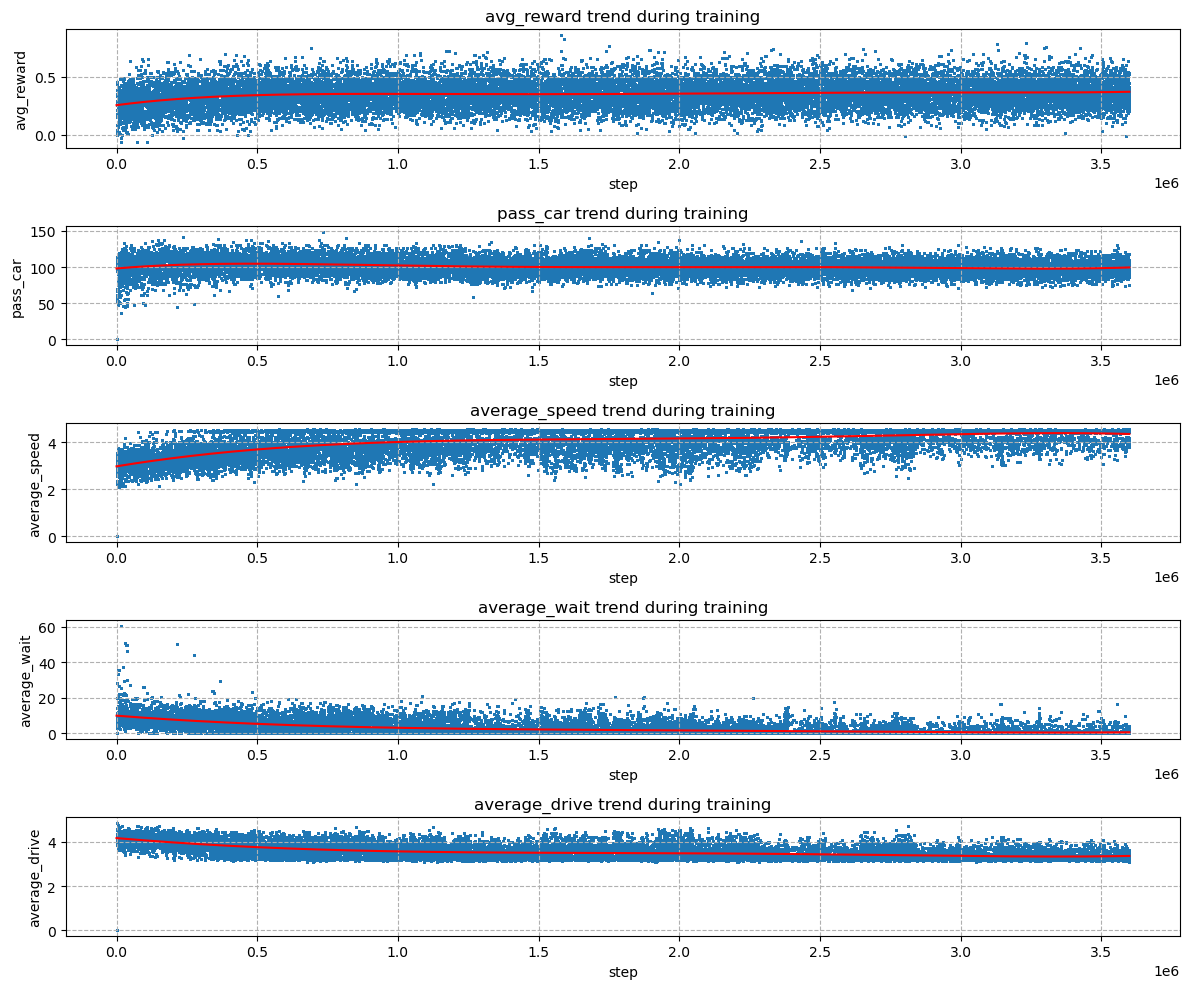

In [41]:
getTrend(df_rl_2)

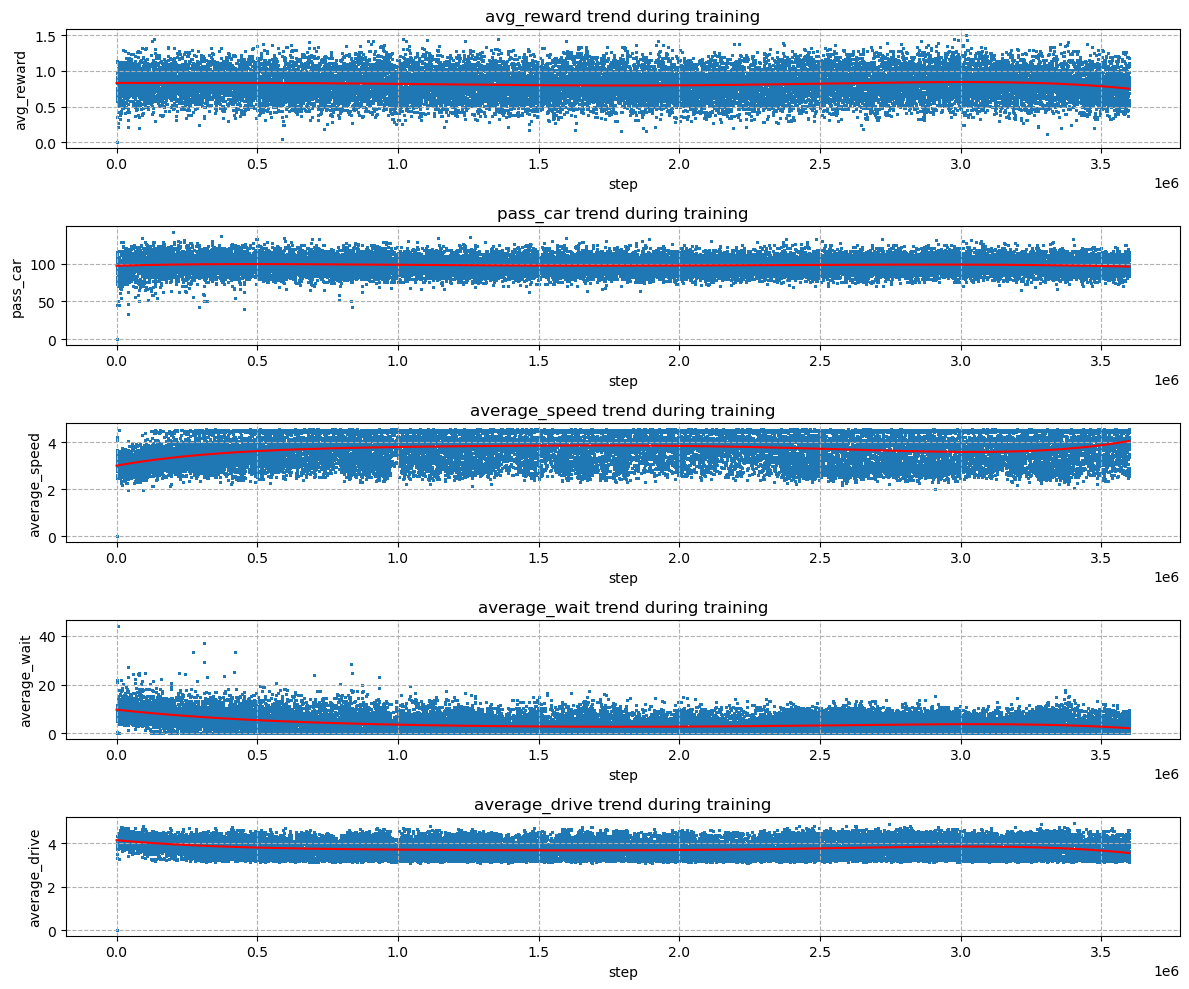

In [42]:
getTrend(df_rl_3)

### Simulation

In [44]:
df_rl_simu_1 = pd.read_csv('./model/0_singel_junction_model_bd_1_RL_simu-table.csv')
df_rl_simu_1.rename(columns=column_mapping, inplace=True)
df_rl_simu_1 = df_rl_simu_1[['avg_reward', 'pass_car', 'average_speed', 'average_wait', 'average_drive']].copy()

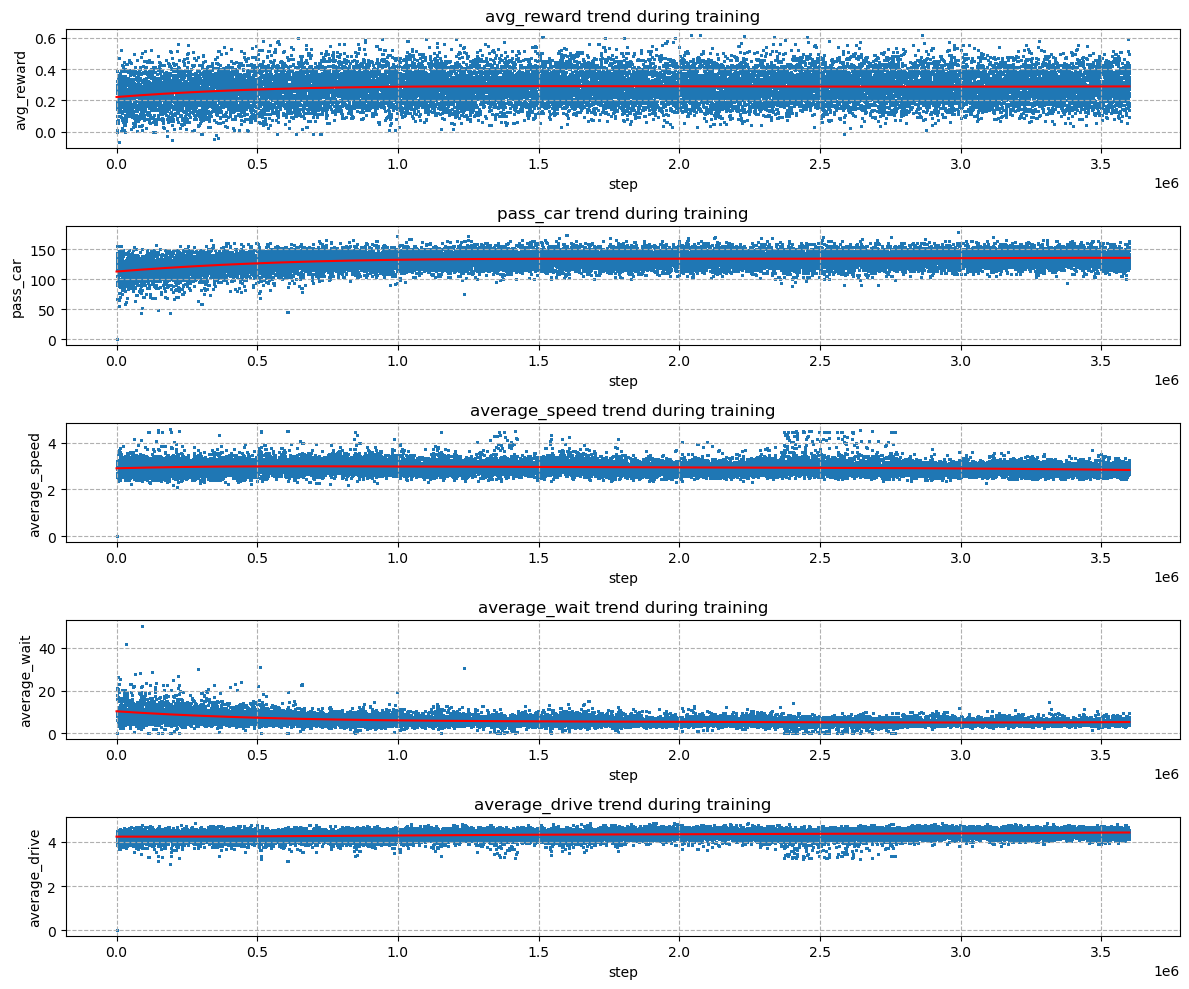

In [45]:
getTrend(df_rl_simu_1)

In [47]:
df_rl_simu_1.tail(1000).describe()

,avg_reward,pass_car,average_speed,average_wait,average_drive
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.272993,135.85400,2.890275,4.867153,4.398320
std,0.124747,2.67504,0.176609,0.457721,0.127651
min,0.094260,131.00000,2.711647,4.074074,4.115108
25%,0.141680,135.00000,2.769566,4.808824,4.370370
50%,0.348451,136.00000,2.820035,4.816176,4.419118
75%,0.378348,139.00000,3.031099,4.978417,4.496183
max,0.428173,139.00000,3.258644,5.618321,4.546763
